# Necessary Modules
Let us load the modules whose functionalities would aid the EDA.

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from sklearn.metrics import silhouette_score

from scipy.stats import gaussian_kde
from scipy.stats import f_oneway

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

# Reading the Data
Loading `Sales.csv`.

\[Insert information about your dataset here.\]

In [387]:
df = pd.read_csv('Sales.csv')

df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


# EDA Part 0
Let us prepare our data for the analysis.

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.0+ MB


## Check for Nulls

In [389]:
has_nulls = df[df.isnull().any(axis=1)]

has_nulls.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095


## Remove null row

We only have one row with null values, so we can go ahead and just remove it since we would still havfe 34866 data points left.

In [390]:
df1 = df.dropna()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34866 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.3+ MB


## Check for Duplicates
No dupes present.

In [391]:
df1_dupes = df1[df1.duplicated() == True]

df1_dupes

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue


## Check for Misinputted Data

Looks fine?

In [392]:
df1['Month'].unique()

array(['February', 'March', 'April', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'May', 'January'],
      dtype=object)

In [393]:
df1['Year'].unique()

array([2016., 2015.])

In [394]:
df1['Customer Age'].unique()

array([29., 18., 19., 20., 22., 24., 40., 21., 23., 25., 30., 55., 53.,
       52., 51., 50., 49., 48., 47., 46., 45., 41., 42., 65., 64., 32.,
       33., 63., 34., 35., 43., 62., 37., 44., 60., 59., 58., 36., 61.,
       57., 54., 38., 39., 27., 28., 17., 26., 67., 66., 71., 31., 56.,
       87., 70., 69., 73., 68., 75., 86., 85., 77., 81., 84., 78., 72.,
       80., 74., 76., 79., 82.])

In [395]:
df1['Customer Gender'].unique()

array(['F', 'M'], dtype=object)

In [396]:
df1['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

In [397]:
df1['State'].unique()

array(['Washington', 'California', 'Oregon', 'Essonne', 'Yveline',
       'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland',
       'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais',
       'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret',
       'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama',
       "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio',
       'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme',
       'New York', 'Florida', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana',
       'Arizona', 'Massachusetts', 'Utah'], dtype=object)

In [398]:
df1['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [399]:
df1['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

##  Focus on Context
We would like to focus on datapoints from the United States as per the context of the analysis.

In [400]:
df2 = df1[df1['Country'] == 'United States']
df2

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,34717,09/22/15,2015.0,September,61.0,F,United States,California,Accessories,Tires and Tubes,3.0,14.67,17.333333,44.0,52.0
34718,34718,09/22/15,2015.0,September,61.0,F,United States,California,Accessories,Tires and Tubes,2.0,114.00,113.500000,228.0,227.0
34721,34721,5/12/2015,2015.0,December,61.0,F,United States,California,Accessories,Tires and Tubes,1.0,450.00,529.000000,450.0,529.0
34722,34722,5/12/2015,2015.0,December,61.0,F,United States,California,Accessories,Tires and Tubes,1.0,120.00,131.000000,120.0,131.0


Let us now create a new column called `Profit`, which is `Revenue` minus `Cost`.

In [401]:
df2['Profit'] = df2['Revenue'] - df2['Cost']
df2

/tmp/ipython-input-3697811449.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0
3,3,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0
4,4,12/3/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,34717,09/22/15,2015.0,September,61.0,F,United States,California,Accessories,Tires and Tubes,3.0,14.67,17.333333,44.0,52.0,8.0
34718,34718,09/22/15,2015.0,September,61.0,F,United States,California,Accessories,Tires and Tubes,2.0,114.00,113.500000,228.0,227.0,-1.0
34721,34721,5/12/2015,2015.0,December,61.0,F,United States,California,Accessories,Tires and Tubes,1.0,450.00,529.000000,450.0,529.0,79.0
34722,34722,5/12/2015,2015.0,December,61.0,F,United States,California,Accessories,Tires and Tubes,1.0,120.00,131.000000,120.0,131.0,11.0


Let us now check for outliers for `Profit`.

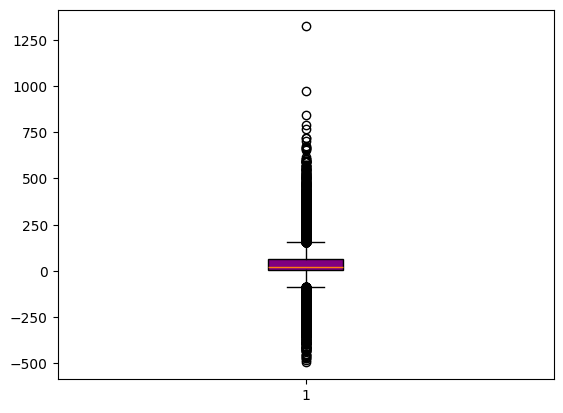

In [402]:
plt.boxplot(df2['Profit'], patch_artist=True, boxprops=dict(facecolor='purple'))
plt.show()

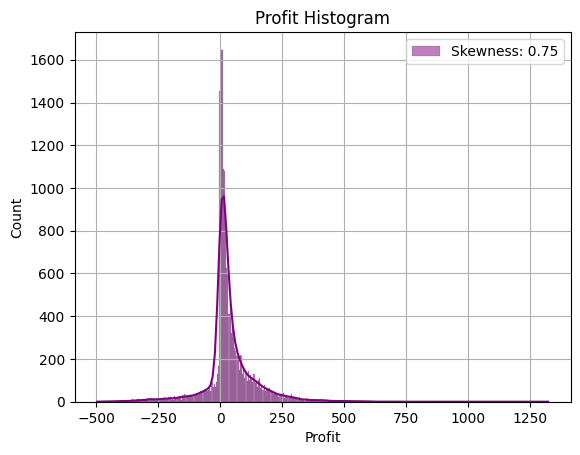

In [403]:
sns.histplot(df2["Profit"],label="Skewness: %.2f"%(df2["Profit"].skew()), color='purple', kde=True)
plt.title('Profit Histogram')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.grid(True)
plt.legend()

Though tails appear heavy, there is really no need to transform the data since this faithfully represents the economically real phenomenon where some items bring in profits while others are not so profitable. The slight right-skew also indicates that the business is at least managing to make positive net profits with each purchase of an item most of the time.

## Finalized Data

With that done, the following shall serve as the data set for the rest of our analysis.

In [404]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18076 entries, 0 to 34723
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             18076 non-null  int64  
 1   Date              18076 non-null  object 
 2   Year              18076 non-null  float64
 3   Month             18076 non-null  object 
 4   Customer Age      18076 non-null  float64
 5   Customer Gender   18076 non-null  object 
 6   Country           18076 non-null  object 
 7   State             18076 non-null  object 
 8   Product Category  18076 non-null  object 
 9   Sub Category      18076 non-null  object 
 10  Quantity          18076 non-null  float64
 11  Unit Cost         18076 non-null  float64
 12  Unit Price        18076 non-null  float64
 13  Cost              18076 non-null  float64
 14  Revenue           18076 non-null  float64
 15  Profit            18076 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usa

# EDA Part 1
**Question:** Which U.S. state is best for one to locate an accessory business?

To answer this question, we wish to find the state that generates the most profit on *average*.

Concerning the *total* profit for each state would not be ideal since larger states which would include more stores will dominate in that comparison.

First, let us check how many data points that each state has.

In [405]:
df21 = df2[df2['Product Category']=='Accessories']
df21['State'].value_counts()

,count
State,
California,6789
Washington,3566
Oregon,1626
Texas,12
Ohio,11
Illinois,10
New York,8
Florida,5
Kentucky,4


Unfortunately, all the states except California, Washington, and Oregon have 12 entries or less. Accordingly, we cannot include the other states in our comparative analysis as the data is too lacking to be helpful. In particular, since we are concerned with which among the states generates the most revenue on average, it would not make sense to include the other states since they generate so little sales. Average revenue estimates based on only so few transactions are highly unstable and thus cannot reliably reflect market potential.  

Hence, we have to reframe our question to the following:

> *Among U.S. states with sufficient historical sales volume, where is the best location for one to establish an accessory business?*

Namely, we are going to only analyze states with at least, say, 1000 transactions (data points), leaving us only with the states California, Washington, and Oregon.

In [406]:
state_groups = df21[df21['State'].isin(['California', 'Washington', 'Oregon'])].groupby('State', as_index=False)
state_groups

In [407]:
ca_wa_or = state_groups['Profit'].mean()

fig1 = px.bar(
    ca_wa_or,
    x='State',
    y='Profit',
    title='Average Profit by State',
    labels={'Profit': 'Average Profits', 'State': 'State'},
    text_auto=True
)
fig1.update_layout(xaxis={'categoryorder':'total descending'})
fig1.show()

Let us perform a Kolmogorov-Smirnov test to see if the data of each group is normally distributed. This is needed to see what test we can use to test for homoscedasity.

In [408]:
CA_pval = sp.stats.kstest(state_groups.get_group('California')['Profit'], 'norm').pvalue
WA_pval = sp.stats.kstest(state_groups.get_group('Washington')['Profit'], 'norm').pvalue
OR_pval = sp.stats.kstest(state_groups.get_group('Oregon')['Profit'], 'norm').pvalue
print(CA_pval, WA_pval, OR_pval)

0.0 0.0 0.0


Let us now check of our data is homoscedastic, i.e., they have the same variances. Given that our groups contain data that are not normally distributed, Bartlett's test might not be the most reliable. Thus, we have to use the Levene test since it is less sensitive to deviations from normality.



In [409]:
samples = [group['Profit'].values for name, group in state_groups]
samples
stat, pval = sp.stats.levene(*samples)
print(pval)

0.23368197171022403


The $p$-value is greater than $0.05$, so there is not enough evidence to conclude that the variances are not all pairwise equal. Thus, we can say that our groups have the same variances.

Because of the difference in sample sizes, we must use one-tailed $t$-test to compare each pair of states.

In [410]:
sts = ['California', 'Washington', 'Oregon']
count = 1
for i in range(len(sts)):
    for j in range(i+1, len(sts)):
        group1 = df21[df21['State'] == sts[i]]['Profit']
        group2 = df21[df21['State'] == sts[j]]['Profit']
        tp = sp.stats.ttest_ind(group1, group2, equal_var=True, alternative='less')
        print(f"{count}. t-test for {sts[i]} and {sts[j]}: {tp.pvalue}")
        count+=1

1. t-test for California and Washington: 0.8695779659561923
2. t-test for California and Oregon: 0.9318933817882871
3. t-test for Washington and Oregon: 0.735491624212051


From this, as all the $p$-values are not less than $0.05$, let alone the Bonferonni corrected $p$-value of $0.05/3 \approx 0.0167$ (only 3 comparisons and not 6 due to symmetry), we see that there is not enough evidence to believe that averages are significantly different from one another.

## Conclusion for Part 1
The three states California, Washington, and Oregon all appear to be good choices as they have, more or less, equal average revenue. However, given how California has the most records, I would say that it would be best to set up business in California due to a higher recorded frequency in sales.

# EDA Part 2

**Question:** What are the most profitable accessory products?

First, let us actually see what types of accessory products exist and how many transactions have been made for each of them.


In [411]:
counts = df21['Sub Category'].value_counts()
counts

,count
Sub Category,
Tires and Tubes,5871
Bottles and Cages,2922
Helmets,2018
Fenders,517
Cleaners,352
Hydration Packs,239
Bike Stands,78
Bike Racks,58


We note a strong imbalance between each type. Fortunately, each subcategory has enough data points for us to work with.


Let us now create a bar graph to see which subcategory generates the most profit on average.

In [412]:
subcats_groups = df21.groupby('Sub Category', as_index=False)
subcats_groups

In [413]:
tot_revenue_per_ac = subcats_groups['Profit'].mean()

fig2 = px.bar(
    tot_revenue_per_ac,
    x='Sub Category',
    y='Profit',
    title='Average Profit by Type of Accessory',
    labels={'Profit': 'Average Profit per Transaction', 'Sub Category': 'Accessory Type'},
    text_auto=True
)
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

To check for homoscedasticity, let us use Levene's test.

In [414]:
samples = [group['Profit'].values for name, group in subcats_groups]
stat, pval = sp.stats.levene(*samples)
print(pval)

0.0


Thus, there is enough evidence to believe that our groups do not have equal variances. Thus, we have to make use of Welch's $t$-test. Let us also adjust the target $p$-value using a Bonferonni correction: since we are going to make 28 comparisons ("8 choose 2" is 28), our significance level is now $0.05/28\approx 0.001786$.

In [415]:
subcategories = ['Bike Racks', 'Hydration Packs', 'Bike Stands', 'Helmets', 'Fenders', 'Tires and Tubes', 'Cleaners', 'Bottles and Cages']
count = 1
status = ""
bonferonni_p = 0.05/28
for i in range(len(subcategories)):
    for j in range(i+1, len(subcategories)):
          group1 = df21[df21['Sub Category'] == subcategories[i]]['Profit']
          group2 = df21[df21['Sub Category'] == subcategories[j]]['Profit']
          welch_t = sp.stats.ttest_ind(group1, group2, equal_var=False, alternative='greater')
          if welch_t.pvalue < bonferonni_p:
            status = "[X] Reject H0"
          else:
            status = "[O] Fail to Reject H0"
          print(f"{count}. Welch's t-test for {subcategories[i]} and {subcategories[j]}:\n{status}\n")
          count+=1

1. Welch's t-test for Bike Racks and Hydration Packs:
[X] Reject H0

2. Welch's t-test for Bike Racks and Bike Stands:
[X] Reject H0

3. Welch's t-test for Bike Racks and Helmets:
[X] Reject H0

4. Welch's t-test for Bike Racks and Fenders:
[X] Reject H0

5. Welch's t-test for Bike Racks and Tires and Tubes:
[X] Reject H0

6. Welch's t-test for Bike Racks and Cleaners:
[X] Reject H0

7. Welch's t-test for Bike Racks and Bottles and Cages:
[X] Reject H0

8. Welch's t-test for Hydration Packs and Bike Stands:
[O] Fail to Reject H0

9. Welch's t-test for Hydration Packs and Helmets:
[X] Reject H0

10. Welch's t-test for Hydration Packs and Fenders:
[X] Reject H0

11. Welch's t-test for Hydration Packs and Tires and Tubes:
[X] Reject H0

12. Welch's t-test for Hydration Packs and Cleaners:
[X] Reject H0

13. Welch's t-test for Hydration Packs and Bottles and Cages:
[X] Reject H0

14. Welch's t-test for Bike Stands and Helmets:
[X] Reject H0

15. Welch's t-test for Bike Stands and Fenders:


## Conclusion for Part 2

As a result of the 28 comparisons above, we have the following ranking.
1. Bike Racks
2. Bike Stands
3. Hydration Packs
4. Fenders
5. Helmets
6. Tires and Tubes
7. Bottles and Cages
8. Cleaners

So, the top 3 items are: Bike Racks, Bike Stands, and Hydration Packs.

# EDA Part 3

**Question:** Which demographic of customers (based on age or gender) is most likely to buy accessories?

To answer this, let us create a logistic regression model to determine how gender and age affect the odds of buying accessory items.

First, let us label each data point with a `1` if an acessory was purchased or a `0` if something else was purchased.

In [416]:
df2['AccessoryPurchased'] = (df2['Product Category'] == 'Accessories').astype(int)
df2['AccessoryPurchased']

/tmp/ipython-input-2946909916.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AccessoryPurchased
0,1
1,0
2,1
3,1
4,1
...,...
34717,1
34718,1
34721,1
34722,1


Our logit model shall take the following form:
$$\ln\left(\frac{\mathbb{P}(\text{Accessory})}{1-\mathbb{P}(\text{Accessory})}\right) = \beta_0 + \beta_1\,\text{Gender} + \beta_2\,\text{Age}$$
where $\text{Gender}=0$ corresponds to a male-identifying customer and $\text{Gender}=1$ correpsonds to a female-identifying customer.

That being said, let us prepare our variables accordingly.

In [417]:
df2["Gender"] = df2["Customer Gender"].map({"M": 0, "F": 1})
X = df2[["Gender", "Customer Age"]]
X

/tmp/ipython-input-662494353.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Customer Age
0,1,29.0
1,1,29.0
2,1,29.0
3,1,29.0
4,1,29.0
...,...,...
34717,1,61.0
34718,1,61.0
34721,1,61.0
34722,1,61.0


In [418]:
y = df2['AccessoryPurchased']
model = sm.Logit(y, sm.add_constant(X))
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.636344
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     AccessoryPurchased   No. Observations:                18076
Model:                          Logit   Df Residuals:                    18073
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Jan 2026   Pseudo R-squ.:               6.727e-06
Time:                        15:14:17   Log-Likelihood:                -11503.
converged:                       True   LL-Null:                       -11503.
Covariance Type:            nonrobust   LLR p-value:                    0.9255
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6730      0.056     11.973      0.000       0.563       0.783
Gender           0.0031

Neither gender nor age appears to significantly influence the odds of buying accessory-type items. In fact, even the Pseudo $R^2$ value is close to $0$, indicating that our predictors account for almost no variation in the odds of buying accessory-type items.

## Conclusion for Part 3
As we saw in the results of the logistic regression, neither age nor gender meaningfully predicts accessory purchase likelihood.